In [1]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
# Original Data Path
original_dataset_dir = './datasets/train'

# 훈련,테스트,검증을 위한 이미지 3등분
# Small Dataset Path
base_dir = './datasets/cats_and_dogs_small'

if os.path.exists(base_dir): ## 반복적인 실행을 위해 디렉터리를 삭제함.(매번 작업을 할 때마다 지워주기 귀찮으니깐!)
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [8]:
# Train, Vaildation, Test data
train_dir = os.path.join(base_dir, 'train') # 위에 쓰인 경로 뒤에 각각 train, validation, test를 붙여 디렉터리 생성.
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [15]:
# file copy

# # 파이썬 코린이 방법
# fnames = []
# for i in range(1000):
#     filename = 'cat.P{}'.format(i)
#     fnames.append(filename)
# print(fnames)

#cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] # 위에 과정을 이 한줄로 끝!
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)# 원본 경로
    dst = os.path.join(train_cats_dir, fname) #학습 시킬 경로
    shutil.copyfile(src, dst) # 원본 경로 -> 학습시킬 경로로 copyfile
# 이렇게해서 학습용 데이터 1000개를 확보한 것
    
#cat train data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 이렇게해서 학습용 데이터 1000개를 확보한 것
print('---------------------------Test dataset copy completed')

In [16]:
#cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst)
    
    
#dog validation data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst)
print('---------------------------Validation dataset copy completed') # 언제 끝났는지모르니 이거 표시해주는게 좋다.

---------------------------Validation dataset copy completed


In [17]:
#cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst)
    
#dog test data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst)
print('---------------------------test dataset copy completed')

---------------------------test dataset copy completed


In [22]:
print('Train cat images: ', len(os.listdir(train_cats_dir))) #listdir : 지정되어 있는 경로의 파일 목록이 나옴.(갯수X) 그러므로 len을 통해 몇 개인지 알아본다.
print('Train dog images: ', len(os.listdir(train_dogs_dir)))
print('Validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Test cat images: ', len(os.listdir(test_cats_dir)))
print('Test dog images: ', len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


In [23]:
# Build network

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3))) # input_shape 150,150,3인 이유는 컬러라서. conv2D에서 (3,3)은 합성곱
model.add(layers.MaxPooling2D((2,2))) # 항상 Conv2D와 MaxPool2D는 같이 교차해서 사용한다.
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2))) # 필터링
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten()) # 한줄로(1차원)으로 펴주는 애
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 마지막 개 or 고양이 분류(이진분류)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [24]:
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

- 지금은 데이터가 JPEG 파일로 되어 있으므로 다음 과정이 필요.

1. 사진 파일을 읽음.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩.
3. 부동 소수 타입의 텐서로 변환.
4. 픽셀 값(0~ 255 사이)의 스케일을 [0, 1] 사이로 조정(신경망은 작은 입력 값을 선호하기 때문).

In [25]:
# 위에 만든 것들을 텐서로 만들어보자.
#Data preprocessing

# Image scaling 각 이미지마다 크기가 다르므로.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 0-255의 RGB 계수로 구성을 0~1 범위로 표현
train_datagen = ImageDataGenerator(rescale = 1./255) 
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    # 타깃 디렉터리
                        train_dir,
    # 모든 이미지를 150 × 150 크기로 변경
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
                        test_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
train_generator

In [29]:
for data_batch, labels_batch in train_generator:
    print('Batch Data Size: ', data_batch.shape)
    print('Batch Label Size: ', labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [33]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, #이미지를 읽어와 처리하는 단위. 100개 단위로 끊어서 처리
    epochs=30, #총 30번을 반복
    validation_data=validation_generator,
    validation_steps=50 # 50개 단위로 검증
)

Epoch 1/30
100/100 [==============================] - 182s 2s/step - loss: 0.7432 - accuracy: 0.5175 - val_loss: 0.6824 - val_accuracy: 0.5300
Epoch 2/30
100/100 [==============================] - 166s 2s/step - loss: 0.6964 - accuracy: 0.5790 - val_loss: 0.6739 - val_accuracy: 0.5630
Epoch 3/30
100/100 [==============================] - 166s 2s/step - loss: 0.6278 - accuracy: 0.6465 - val_loss: 0.6380 - val_accuracy: 0.6330
Epoch 4/30
100/100 [==============================] - 167s 2s/step - loss: 0.5888 - accuracy: 0.6985 - val_loss: 0.5949 - val_accuracy: 0.6970
Epoch 5/30
100/100 [==============================] - 166s 2s/step - loss: 0.5294 - accuracy: 0.7245 - val_loss: 0.5635 - val_accuracy: 0.7030
Epoch 6/30
100/100 [==============================] - 165s 2s/step - loss: 0.4959 - accuracy: 0.7765 - val_loss: 0.5846 - val_accuracy: 0.7120
Epoch 7/30
100/100 [==============================] - 159s 2s/step - loss: 0.4255 - accuracy: 0.7995 - val_loss: 0.6277 - val_accuracy: 0.7070

In [34]:
model.save('cats_and_dogs_small_1.0.h5') #케라스 파일 확장자는 .h5

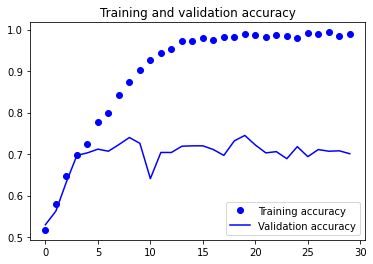

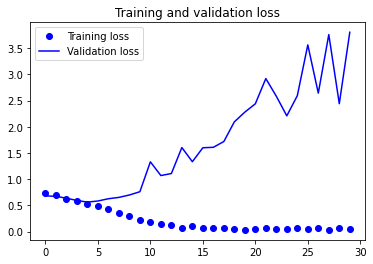

In [48]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 과대적합의 특성을 확인

In [49]:
#Data가 절대적으로 적을 때 증식하는 방법1(이미 내장되어 있다. 사진을 돌리거나 각도조절해서 다른 사진인 것 처럼)
datagen = ImageDataGenerator(
    rotation_range =  40, #사진회전
    width_shift_range = 0.2, #수평 이동
    height_shift_range = 0.2, # 수직 이동
    shear_range = 0.2, # 기울기 변환
    zoom_range = 0.2,# 확대 범위
    horizontal_flip = True, # 수평으로 뒤집음
    fill_mode='nearest'# 가로, 세로 이동으로 인해 새롭게 생성한 픽셀을 채움.
)

In [55]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image # 이미지 볼때 사용

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[4]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1): # datagen에 의해 사진 증식. batch_size=1 : 한 개당 한번씩.
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

AttributeError: module 'tensorflow.compat.v2' has no attribute '__internal__'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # 타깃 디렉터리
    train_dir,
    # 모든 이미지를 150 × 150 크기로 바꿉니다
    target_size=(150, 150),
    batch_size=32,
    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)